# Read and describe the dataset 

In [63]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_validate , StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder ,  OneHotEncoder , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm  import    SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


In [3]:
#read the data
housing  =  pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

In [4]:
#head of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#info of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#describe the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#categorical colum
count_ocean = housing["ocean_proximity"].value_counts()
print(count_ocean)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


# Visulization

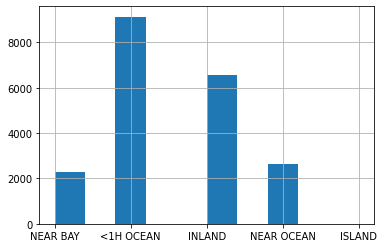

In [8]:
#categorical_attribute_histogram_plots
housing["ocean_proximity"].hist()
plt.savefig("categorical_attribute_histogram_plots")

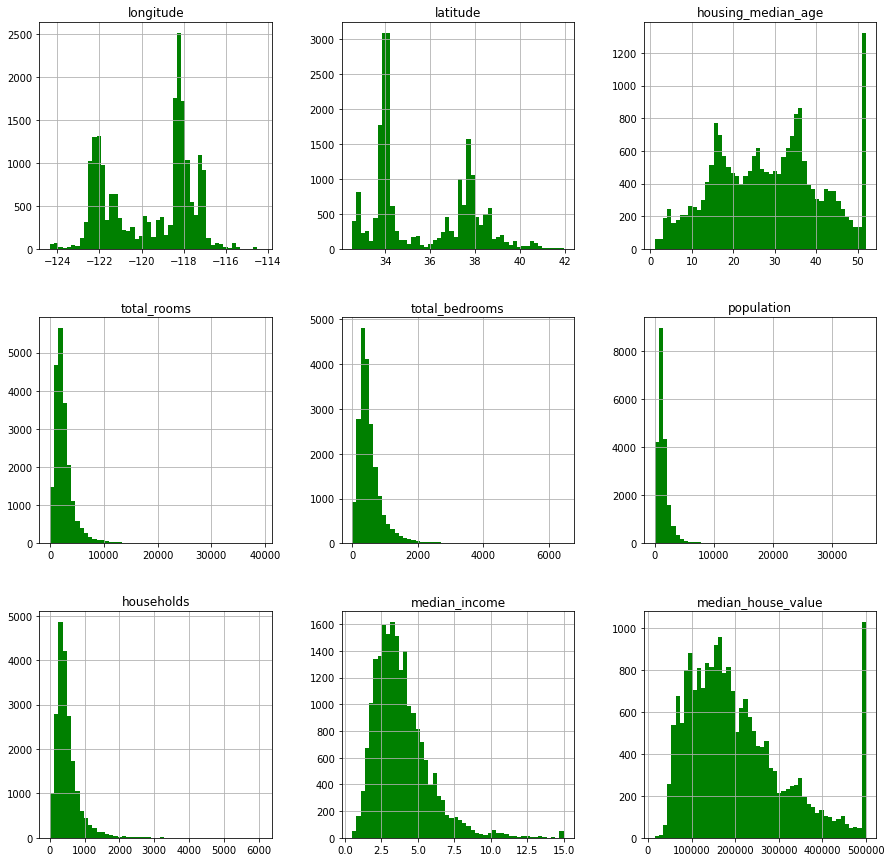

In [9]:
#numberical_attribute_histogram_plots
housing.hist(bins = 50 ,color = 'green' ,figsize =(15,15))
plt.savefig("numberical_attribute_histogram_plots")

# Train Test  

In [10]:
housing_train , housing_test =  train_test_split(housing,test_size = 0.2,random_state = 20)

In [11]:
print('the size of train dataset is ', len(housing_train))
print('the size of test dataset is ',len(housing_test))

the size of train dataset is  16512
the size of test dataset is  4128


In [12]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7728,-118.13,33.92,28.0,3069.0,864.0,1932.0,835.0,2.4925,177200.0,<1H OCEAN
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,181400.0,NEAR OCEAN
8099,-118.22,33.81,41.0,726.0,166.0,602.0,183.0,3.7885,156900.0,NEAR OCEAN
4772,-118.34,34.04,42.0,1681.0,360.0,987.0,337.0,2.6000,171400.0,<1H OCEAN
11663,-118.02,33.85,31.0,1922.0,329.0,1030.0,353.0,5.3416,213000.0,<1H OCEAN


In [13]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6111,-117.90,34.13,25.0,3076.0,856.0,2868.0,752.0,2.6619,117600.0,<1H OCEAN
17742,-121.78,37.31,7.0,1973.0,328.0,1047.0,303.0,6.2340,292200.0,<1H OCEAN
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,131300.0,NEAR BAY
13150,-121.47,36.92,27.0,2049.0,417.0,1230.0,336.0,4.6477,265900.0,INLAND
527,-122.25,37.77,52.0,1038.0,220.0,482.0,215.0,3.1771,210200.0,NEAR BAY


In [14]:
housing['income'] = pd.cut(housing['median_income'], bins = [0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing['income'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income, dtype: int64

<AxesSubplot:>

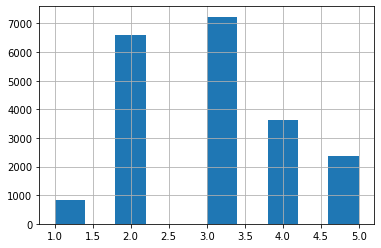

In [15]:
housing['income'].hist()

In [16]:
housing_train , housing_test =  train_test_split(housing,test_size = 0.2,random_state = 20)

In [17]:
Stratified = StratifiedShuffleSplit(n_splits=1,test_size = 0.2, random_state = 20)
for train_index,test_index in Stratified.split(housing,housing['income']):
   train_data = housing.loc[train_index]
   test_data = housing.loc[test_index]
   

In [18]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
13080,-121.35,38.54,12.0,16239.0,3358.0,8656.0,3234.0,3.5691,116300.0,INLAND,3
17915,-121.99,37.36,33.0,2321.0,480.0,1230.0,451.0,4.9091,270300.0,<1H OCEAN,4
16625,-120.84,35.37,34.0,3279.0,714.0,1397.0,646.0,2.5552,200000.0,NEAR OCEAN,2
5997,-117.73,34.08,33.0,1350.0,265.0,1251.0,257.0,2.9063,115200.0,INLAND,2
18523,-122.06,36.98,15.0,3385.0,669.0,1571.0,615.0,4.2254,320900.0,NEAR OCEAN,3


In [19]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income
6111,-117.90,34.13,25.0,3076.0,856.0,2868.0,752.0,2.6619,117600.0,<1H OCEAN,2
17742,-121.78,37.31,7.0,1973.0,328.0,1047.0,303.0,6.2340,292200.0,<1H OCEAN,5
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,131300.0,NEAR BAY,2
13150,-121.47,36.92,27.0,2049.0,417.0,1230.0,336.0,4.6477,265900.0,INLAND,4
527,-122.25,37.77,52.0,1038.0,220.0,482.0,215.0,3.1771,210200.0,NEAR BAY,3


In [20]:
def income_cat_proportions(data):
   return data['income'].value_counts()/len(housing)

In [21]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(test_data),
    "Random": income_cat_proportions(housing_test),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [22]:
"""
that shows that  test_data  (stratified)  is better than randomly 

"""
compare_props



,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.007946,0.008140,-79.562044,-80.048662
2,0.318847,0.063760,0.064293,-79.835891,-80.003039
3,0.350581,0.070107,0.070349,-79.933665,-80.002764
4,0.176308,0.035271,0.034448,-80.461665,-79.994504
5,0.114438,0.022917,0.022771,-80.101609,-79.974598


In [23]:
#drop the income colum 
for i in (train_data,test_data):
  i.drop('income', axis = 1  , inplace = True)

# Discover and visualize the data

In [24]:
train_data_copy =  train_data.copy()

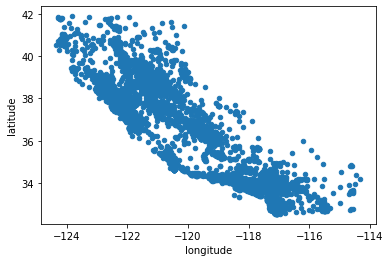

In [25]:
train_data_copy.plot(kind =  'scatter' , x="longitude", y="latitude"  )
plt.savefig("bad visulization ")

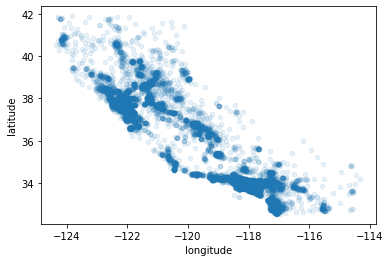

In [26]:
#adding alpha for density  fo areas 
train_data_copy.plot(kind =  'scatter' , x="longitude", y="latitude",  alpha = 0.1  )
plt.savefig("visulization with alpha ")

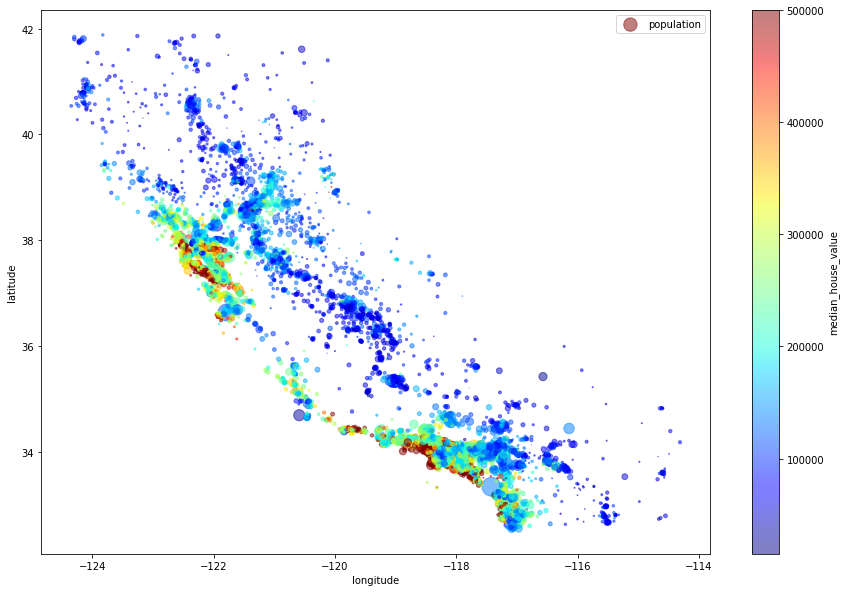

In [27]:
train_data_copy.plot(kind =  'scatter' , x="longitude", y="latitude",  alpha = 0.5 , s=train_data_copy["population"]/100, label="population", figsize=(15,10),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False )
plt.legend()
plt.savefig("good visulization ")

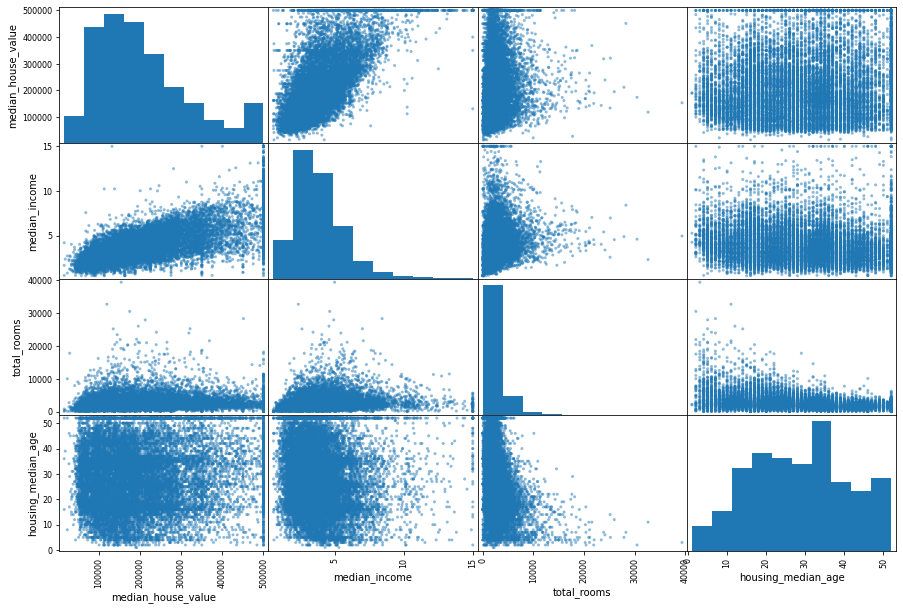

In [28]:
attr = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(train_data_copy[attr],figsize=(15,10))
plt.savefig("scatter matrix")

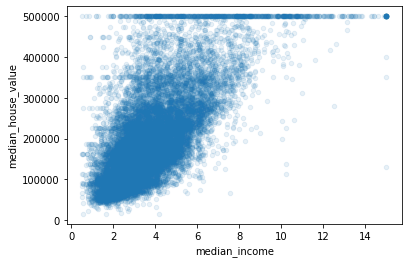

In [29]:
train_data_copy.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.savefig("income_vs_house_value_scatterplot")

# Prepare and clean the data

In [30]:
housing_target = train_data["median_house_value"]
housing_target

5266     500001.0
5621     152300.0
10241    265500.0
19767     68400.0
944      242200.0
           ...   
14623    145200.0
2229     125300.0
19930    107300.0
15993    420300.0
12990    166800.0
Name: median_house_value, Length: 16512, dtype: float64

In [31]:
train_data =  train_data.drop("median_house_value",axis = 1)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619,<1H OCEAN
5621,-118.24,33.78,24.0,574.0,173.0,784.0,162.0,2.2500,NEAR OCEAN
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946,<1H OCEAN
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043,INLAND
944,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072,NEAR BAY


In [32]:
train_data[train_data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10495,-117.66,33.51,18.0,2626.0,NaN,1302.0,522.0,4.0167,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
4667,-118.29,34.05,34.0,1102.0,NaN,1325.0,439.0,1.5972,<1H OCEAN
15890,-122.38,37.73,40.0,543.0,NaN,259.0,89.0,2.2167,NEAR BAY
...,...,...,...,...,...,...,...,...,...
2608,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,<1H OCEAN
19071,-122.53,38.32,22.0,3577.0,NaN,1371.0,501.0,5.7950,<1H OCEAN
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,INLAND


In [33]:
ocean_proximity = train_data[["ocean_proximity"]]


In [34]:
ocean_proximity

,ocean_proximity
5266,<1H OCEAN
5621,NEAR OCEAN
10241,<1H OCEAN
19767,INLAND
944,NEAR BAY
...,...
14623,NEAR OCEAN
2229,INLAND
19930,INLAND
15993,NEAR BAY


In [35]:

X = train_data.drop ('ocean_proximity', axis = 1)

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619
5621,-118.24,33.78,24.0,574.0,173.0,784.0,162.0,2.2500
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043
944,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072


In [36]:
imputer = SimpleImputer(strategy="mean")

imputer.fit(X)
x_imputer = imputer.transform(X)

In [37]:
train_data =  pd.DataFrame(x_imputer,index = X.index ,columns= X.columns)

In [38]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619
5621,-118.24,33.78,24.0,574.0,173.0,784.0,162.0,2.2500
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043
944,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072


In [39]:
train_data[train_data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [40]:
Standard =  StandardScaler()
X = Standard.fit_transform(train_data)
X

array([[ 0.51190228, -0.74775778,  0.97691471, ..., -0.71713529,
        -0.67863514,  2.6154048 ],
       [ 0.66653284, -0.86937591, -0.37458091, ..., -0.56722051,
        -0.89162866, -0.85155836],
       [ 0.84610382, -0.81792209, -0.93107911, ...,  0.25596427,
         0.87089269, -0.09407943],
       ...,
       [ 0.12283184,  0.31406204, -0.93107911, ..., -0.28354942,
        -0.23401118,  0.09631279],
       [-1.44342611,  0.99231699,  0.42041652, ..., -0.23686936,
        -0.1381641 ,  0.68966955],
       [-0.82989195,  1.4320133 , -1.24907808, ...,  0.15183184,
        -0.04497943,  0.96443001]])

In [41]:
train_data  = pd.DataFrame(X,index =  train_data.index ,  columns= train_data.columns)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5266,0.511902,-0.747758,0.976915,-0.536906,-0.717734,-0.717135,-0.678635,2.615405
5621,0.666533,-0.869376,-0.374581,-0.964193,-0.877698,-0.567221,-0.891629,-0.851558
10241,0.846104,-0.817922,-0.931079,0.280021,0.940079,0.255964,0.870893,-0.094079
19767,-1.238915,2.049459,0.261417,-0.559024,-0.625633,-0.651604,-0.646686,-0.823086
944,-1.218962,0.884732,-0.613080,0.779777,0.334153,0.718276,0.490167,0.961231


In [42]:
encoder = OrdinalEncoder()
ocean_proximity2 = encoder.fit_transform(ocean_proximity) 

In [43]:
ocean_proximity2

array([[0.],
       [4.],
       [0.],
       ...,
       [1.],
       [3.],
       [1.]])

In [44]:
hot_encoder =  OneHotEncoder(sparse =  False)
ocean_proximity2 =  hot_encoder.fit_transform(ocean_proximity2)
ocean_proximity2

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [45]:
ocean_proximity = pd.DataFrame(ocean_proximity2, index = ocean_proximity.index )

In [46]:
ocean_proximity

,0,1,2,3,4
5266,1.0,0.0,0.0,0.0,0.0
5621,0.0,0.0,0.0,0.0,1.0
10241,1.0,0.0,0.0,0.0,0.0
19767,0.0,1.0,0.0,0.0,0.0
944,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
14623,0.0,0.0,0.0,0.0,1.0
2229,0.0,1.0,0.0,0.0,0.0
19930,0.0,1.0,0.0,0.0,0.0
15993,0.0,0.0,0.0,1.0,0.0


In [47]:
Stratified = StratifiedShuffleSplit(n_splits=1,test_size = 0.2, random_state = 20)
for train_index,test_index in Stratified.split(housing,housing['income']):
   train_data = housing.loc[train_index]
   test_data = housing.loc[test_index]

In [48]:
test_data.drop('income', axis = 1,inplace =  True)
train_data.drop('income', axis = 1,inplace =  True)
train_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619,500001.0,<1H OCEAN
5621,-118.24,33.78,24.0,574.0,173.0,784.0,162.0,2.2500,152300.0,NEAR OCEAN
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946,265500.0,<1H OCEAN
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043,68400.0,INLAND
944,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072,242200.0,NEAR BAY


In [49]:
y_train = train_data.iloc[:,8:9].values
y_test =  test_data.iloc[:,8:9].values

y_train

array([[500001.],
       [152300.],
       [265500.],
       ...,
       [107300.],
       [420300.],
       [166800.]])

In [50]:
train_data.drop('median_house_value',axis = 1,inplace =  True )
test_data.drop('median_house_value',axis = 1 ,inplace =  True)

In [51]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619,<1H OCEAN
5621,-118.24,33.78,24.0,574.0,173.0,784.0,162.0,2.2500,NEAR OCEAN
10241,-117.88,33.89,17.0,3218.0,923.0,1701.0,824.0,3.6946,<1H OCEAN
19767,-122.06,40.02,32.0,1435.0,277.0,690.0,254.0,2.3043,INLAND
944,-122.02,37.53,21.0,4280.0,673.0,2216.0,681.0,5.7072,NEAR BAY


In [52]:
X_train =  train_data.iloc[:,:].values
X_test =  test_data.iloc[:,:].values

In [53]:
#missing values
imputer.fit(X_train[:,0:8])
X_train[:,0:8] =imputer.transform(X_train[:,0:8])

In [54]:
X_train

array([[-118.55, 34.04, 41.0, ..., 242.0, 8.8619, '<1H OCEAN'],
       [-118.24, 33.78, 24.0, ..., 162.0, 2.25, 'NEAR OCEAN'],
       [-117.88, 33.89, 17.0, ..., 824.0, 3.6946, '<1H OCEAN'],
       ...,
       [-119.33, 36.31, 17.0, ..., 409.0, 4.0577, 'INLAND'],
       [-122.47, 37.76, 34.0, ..., 445.0, 5.1893, 'NEAR BAY'],
       [-121.24, 38.7, 13.0, ..., 480.0, 5.7133, 'INLAND']], dtype=object)

In [55]:
X_test[:,0:8] =imputer.transform(X_test[:,0:8])
X_test

array([[-121.35, 38.54, 12.0, ..., 3234.0, 3.5691, 'INLAND'],
       [-121.99, 37.36, 33.0, ..., 451.0, 4.9091, '<1H OCEAN'],
       [-120.84, 35.37, 34.0, ..., 646.0, 2.5552, 'NEAR OCEAN'],
       ...,
       [-122.2, 37.88, 36.0, ..., 155.0, 7.7736, 'NEAR BAY'],
       [-117.02, 32.81, 27.0, ..., 320.0, 4.0656, '<1H OCEAN'],
       [-117.07, 32.77, 34.0, ..., 429.0, 3.5446, 'NEAR OCEAN']],
      dtype=object)

In [56]:
#encoding  categorical
encoder= LabelEncoder()
X_train[:,8]=encoder.fit_transform(X_train[:,8])
onehotencoder=OneHotEncoder(sparse= False)
ct = ColumnTransformer([("ocean_proximity", OneHotEncoder(), [8])], remainder = 'passthrough')
X_train = ct.fit_transform(X_train)


In [57]:
X_train

array([[1.0, 0.0, 0.0, ..., 617.0, 242.0, 8.8619],
       [0.0, 0.0, 0.0, ..., 784.0, 162.0, 2.25],
       [1.0, 0.0, 0.0, ..., 1701.0, 824.0, 3.6946],
       ...,
       [0.0, 1.0, 0.0, ..., 1100.0, 409.0, 4.0577],
       [0.0, 0.0, 0.0, ..., 1152.0, 445.0, 5.1893],
       [0.0, 1.0, 0.0, ..., 1585.0, 480.0, 5.7133]], dtype=object)

In [58]:
#encoding  x_test
X_test[:,8]=encoder.fit_transform(X_test[:,8])
ct = ColumnTransformer([("ocean_proximity", OneHotEncoder(), [8])], remainder = 'passthrough')
X_test = ct.fit_transform(X_test)

In [59]:
X_test

array([[0.0, 1.0, 0.0, ..., 8656.0, 3234.0, 3.5691],
       [1.0, 0.0, 0.0, ..., 1230.0, 451.0, 4.9091],
       [0.0, 0.0, 0.0, ..., 1397.0, 646.0, 2.5552],
       ...,
       [0.0, 0.0, 0.0, ..., 398.0, 155.0, 7.7736],
       [1.0, 0.0, 0.0, ..., 950.0, 320.0, 4.0656],
       [0.0, 0.0, 0.0, ..., 1849.0, 429.0, 3.5446]], dtype=object)

In [60]:
#Scalling
X_train = Standard.fit_transform(X_train)
X_test = Standard.fit_transform(X_test)


# Train our model

In [69]:
#SVM model 
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


108736.62583825323

In [70]:
estimator=SVR(kernel='linear')
param_grid={'C': [1.1, 5.4, 170, ],
            'epsilon': [0.0003, 0.0109, 0.14, 2],
            'gamma': [0.7001, 0.008, 3.1, 1.3]
}
grid_search = GridSearchCV(estimator, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1.1, 5.4, 170],
                         'epsilon': [0.0003, 0.0109, 0.14, 2],
                         'gamma': [0.7001, 0.008, 3.1, 1.3]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_


{'C': 170, 'epsilon': 0.0003, 'gamma': 0.7001}

In [61]:
#SVM model 
svm_reg = SVR(kernel="linear", C= 170, epsilon= 0.0003, gamma= 0.7001)
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


70619.85874928867

In [64]:
estimator=SVR(kernel='linear')
param_grid={'C': [1.1, 5.4, 170, ],
            'epsilon': [0.0003, 0.0109, 0.14, 2],
            'gamma': [0.7001, 0.008, 3.1, 1.3]
}
Rand_search = RandomizedSearchCV(estimator, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
Rand_search.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

RandomizedSearchCV(cv=5, estimator=SVR(kernel='linear'),
                   param_distributions={'C': [1.1, 5.4, 170],
                                        'epsilon': [0.0003, 0.0109, 0.14, 2],
                                        'gamma': [0.7001, 0.008, 3.1, 1.3]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
Rand_search.best_params_


{'gamma': 0.7001, 'epsilon': 0.0109, 'C': 170}

In [66]:
#SVM model 
svm_reg = SVR(kernel="linear", C= 170, epsilon= 0.0109, gamma= 0.7001)
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


70619.85856565142